In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import cv2

In [3]:
image_path ='/content/drive/MyDrive/Brain_Tumor'
no_bt ='/content/drive/MyDrive/Brain_Tumor/no_brain_tumor'
yes_bt = '/content/drive/MyDrive/Brain_Tumor/yes_brain_tumor'

Total Images: 609
Training Set: 487 images
Testing Set: 122 images

File: /content/drive/MyDrive/Brain_Tumor/no_brain_tumor/no 10.jpg
Label: Tumor
Image Shape: (750, 750, 3)


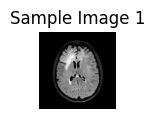


File: /content/drive/MyDrive/Brain_Tumor/no_brain_tumor/N_303.jpg
Label: Tumor
Image Shape: (256, 256, 3)


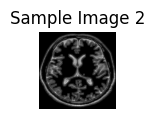


File: /content/drive/MyDrive/Brain_Tumor/no_brain_tumor/N_35.jpg
Label: No Tumor
Image Shape: (256, 256, 3)


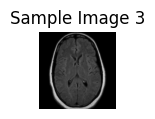


File: /content/drive/MyDrive/Brain_Tumor/no_brain_tumor/N_438.jpg
Label: No Tumor
Image Shape: (256, 256, 3)


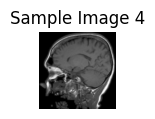


File: /content/drive/MyDrive/Brain_Tumor/no_brain_tumor/N6.jpg
Label: Tumor
Image Shape: (257, 196, 3)


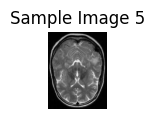


File: /content/drive/MyDrive/Brain_Tumor/no_brain_tumor/N_309.jpg
Label: Tumor
Image Shape: (256, 256, 3)


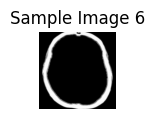


File: /content/drive/MyDrive/Brain_Tumor/no_brain_tumor/N_32.jpg
Label: No Tumor
Image Shape: (256, 256, 3)


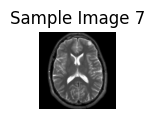


File: /content/drive/MyDrive/Brain_Tumor/yes_brain_tumor/Y82.jpg
Label: Tumor
Image Shape: (223, 226, 3)


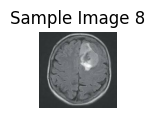


File: /content/drive/MyDrive/Brain_Tumor/no_brain_tumor/N_52.jpg
Label: No Tumor
Image Shape: (256, 256, 3)


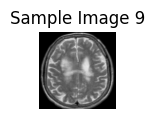


File: /content/drive/MyDrive/Brain_Tumor/no_brain_tumor/N_140.jpg
Label: Tumor
Image Shape: (256, 256, 3)


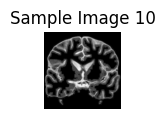

In [4]:
def load_and_explore_brain_tumor_data(no_bt, yes_bt, test_size=0.2, random_state=42):
  # load not tumor files
   not_tumor_files = [os.path.join(no_bt, file) for file in os.listdir(no_bt) if file.endswith('.jpg')]
  # load tumor files
   yes_tumor_files = [os.path.join(yes_bt, file)for file in os.listdir(yes_bt)if file.endswith('.jpg')]
  #combining tumor and non tumor files
   all_combined = not_tumor_files + yes_tumor_files
  # Create labels for the dataset (1 for tumor, 0 for no tumor)
   labels = [1] * len(yes_tumor_files) + [0] * len(not_tumor_files)
  # Split the data into training and testing sets
   train_files, test_files, train_labels, test_labels = train_test_split(
        all_combined, labels, test_size=test_size, random_state=random_state
    )


  # Display information about the split
   print(f"Total Images: {len(all_combined)}")
   print(f"Training Set: {len(train_files)} images")
   print(f"Testing Set: {len(test_files)} images")
  # Display a few sample images
   for i in range(min(10, len(train_files))):
        img = cv2.imread(train_files[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display
   # Print information about the image file and label
        print(f"\nFile: {train_files[i]}")
        print(f"Label: {'Tumor' if train_labels[i] == 1 else 'No Tumor'}")
        print(f"Image Shape: {img.shape}")

        # Display the image
        plt.figure(figsize=(1, 1))
        plt.imshow(img)
        plt.title(f"Sample Image {i+1}")
        plt.axis('off')
        plt.show()
   # Return the variables
   return train_files, test_files, train_labels, test_labels

# Call the function with your folder paths
train_files, test_files, train_labels, test_labels = load_and_explore_brain_tumor_data(yes_bt, no_bt)




In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
import numpy as np

# Function to create and train a basic CNN
def build_and_train_model(train_files, train_labels, test_files, test_labels, epochs=10, img_size=128):
    # Load and preprocess images
    def preprocess_images(files):
        images = [cv2.imread(file) for file in files]
        images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]
        images = [cv2.resize(img, (img_size, img_size)) for img in images]
        images = [img / 255.0 for img in images]
        return np.array(images)

    # Convert to NumPy arrays
    train_images = preprocess_images(train_files)
    test_images = preprocess_images(test_files)
    # Convert labels to NumPy arrays
    train_labels = np.array(train_labels)
    test_labels = np.array(test_labels)


    # Build a simple CNN model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

    return model,preprocess_images

# Call the function with your folder paths
# Assuming you've already defined 'train_files', 'test_files', 'train_labels', and 'test_labels'
model,preprocess_images = build_and_train_model(train_files, train_labels, test_files, test_labels, epochs=10)


Epoch 1/10
16/16 [==============================] - 9s 511ms/step - loss: 0.5584 - accuracy: 0.8090 - val_loss: 0.3884 - val_accuracy: 0.8770
Epoch 2/10
16/16 [==============================] - 7s 418ms/step - loss: 0.4280 - accuracy: 0.8542 - val_loss: 0.3777 - val_accuracy: 0.8770
Epoch 3/10
16/16 [==============================] - 8s 483ms/step - loss: 0.4021 - accuracy: 0.8542 - val_loss: 0.3864 - val_accuracy: 0.8770
Epoch 4/10
16/16 [==============================] - 7s 436ms/step - loss: 0.4025 - accuracy: 0.8542 - val_loss: 0.3837 - val_accuracy: 0.8770
Epoch 5/10
16/16 [==============================] - 8s 519ms/step - loss: 0.3649 - accuracy: 0.8542 - val_loss: 0.3754 - val_accuracy: 0.8770
Epoch 6/10
16/16 [==============================] - 8s 484ms/step - loss: 0.3301 - accuracy: 0.8542 - val_loss: 0.3816 - val_accuracy: 0.8770
Epoch 7/10
16/16 [==============================] - 7s 437ms/step - loss: 0.2947 - accuracy: 0.8522 - val_loss: 0.4067 - val_accuracy: 0.8770
Epoch 

In [13]:
# Convert labels to NumPy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)


In [14]:
# Assuming you have the 'model' variable from the previous code
# and you have already defined 'test_files' and 'test_labels'

# Preprocess test images
test_images = preprocess_images(test_files)
# Convert labels to NumPy array
test_labels = np.array(test_labels)  # Add this line
# Evaluate the model on the test set
eval_results = model.evaluate(test_images, test_labels)

# Display the evaluation results
print(f"\nTest Loss: {eval_results[0]}")
print(f"Test Accuracy: {eval_results[1]}")

# Make predictions on the test set
predictions = model.predict(test_images)

# Convert predictions to binary labels (0 or 1)
binary_predictions = np.round(predictions).flatten()

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(test_labels, binary_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(test_labels, binary_predictions))


4/4 [==============================] - 1s 122ms/step - loss: 0.4348 - accuracy: 0.8770

Test Loss: 0.434810608625412
Test Accuracy: 0.8770492076873779
4/4 [==============================] - 1s 162ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.88      1.00      0.93       107

    accuracy                           0.88       122
   macro avg       0.44      0.50      0.47       122
weighted avg       0.77      0.88      0.82       122


Confusion Matrix:
[[  0  15]
 [  0 107]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
